# **Classical Algorithm: XGBoost**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# 1. Mount the dataset
file_path = '/content/drive/MyDrive/MiniProject_BlackHoleMassEstimation/typeII_AGN_metadata.csv'
data = pd.read_csv(file_path)

In [ ]:
# 2. Define target and features
target_column = 'log_bh_mass'
features = [
    'h_beta_flux', 'h_beta_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
    'h_alpha_flux', 'h_alpha_flux_err', 'nii_6584_flux', 'nii_6584_flux_err',
    'log_stellar_sigma', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
    'psfMag_z', 'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r', 'psfMagErr_i',
    'psfMagErr_z', 'mendel_logM_p50', 'mendel_logM_p16', 'mendel_logM_p84',
    'mendel_logMt_p50', 'mendel_logMt_p16', 'mendel_logMt_p84',
    'mendel_logMb_p50', 'mendel_logMb_p16', 'mendel_logMb_p84',
    'mendel_logMd_p50', 'mendel_logMd_p16', 'mendel_logMd_p84',
    'simard_b_t_g', 'simard_e_b_t_g', 'simard_b_t_r', 'simard_e_b_t_r',
    'simard_Rhlg', 'simard_Rhlr', 'simard_Rchl_g', 'simard_Rchl_r',
    'simard_Re', 'simard_e_Re', 'simard_e', 'simard_e_e', 'simard_nb',
    'simard_e_nb', 'simard_PpS', 'simard_Pn4'
]

In [ ]:
# 3. Handle missing values
data.fillna(data.mean(), inplace=True)

# Features and target
X = data[features]
y = data[target_column]

# 4. Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 5. Train-test split (80:20) and 5-fold validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

In [ ]:
# 6. Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 7. Predictions and evaluation
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Standard deviation of errors
mae_std = np.std([mae] * len(y_test))
mse_std = np.std([mse] * len(y_test))
rmse_std = np.std([rmse] * len(y_test))

# Accuracy by error
range_y = y_test.max() - y_test.min()
accuracy_mae = (1 - mae / range_y) * 100
accuracy_mse = (1 - mse / range_y) * 100
accuracy_rmse = (1 - rmse / range_y) * 100

In [ ]:
print(f'R²: {r2}')
print(f'MAE: {mae} ± {mae_std}')
print(f'MSE: {mse} ± {mse_std}')
print(f'RMSE: {rmse} ± {rmse_std}')
print(f'Accuracy MAE: {accuracy_mae}%')
print(f'Accuracy MSE: {accuracy_mse}%')
print(f'Accuracy RMSE: {accuracy_rmse}%')

R²: 0.8196328471608855
MAE: 0.1837766955439596 ± 5.551115123125783e-17
MSE: 0.07301474200218278 ± 2.7755575615628914e-17
RMSE: 0.2702124016439341 ± 5.551115123125783e-17
Accuracy MAE: 95.55483674666735%
Accuracy MSE: 98.23393032974612%
Accuracy RMSE: 93.46414280207217%


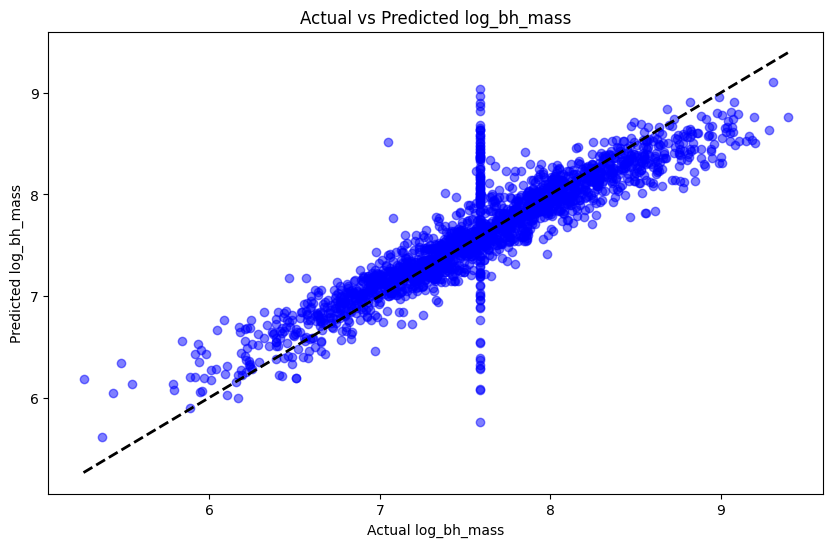

In [ ]:
# 8. Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual log_bh_mass')
plt.ylabel('Predicted log_bh_mass')
plt.title('Actual vs Predicted log_bh_mass')
plt.show()